# ECE657A Homework 2
## Juan Manuel Gomez Gonzalez

Python 3.7 was used for this homework, in Windows 10 using Anaconda, Visual Studio Code and Jupyter Notebook. The pandas, numpy, scikit-learn and seaborn libraries for Python were used.

The blog post from Sebastian Raschka [1] dealing with standardization and normalization was used as a way of understanding how to use scikit-learn for the feature scaling of a dataset. The Pandas 10 minute tutorial, Pandas Cheat Sheet and Pandas CookBook were used to learn how to use the basic functions of Pandas. These documents can be obtained from [2]. Numpy’s statistical functions were also used, and its information can be seen in [3]. Matplotlib’s API guide [4] was used for the plotting component of the homework.

In [1]:
import pandas as pd #Import pandas
import numpy as np
from sklearn import preprocessing #Import preprocessing from the scikit library
from scipy.spatial.distance import pdist, squareform #Import the spatial distance functions, that will be used in Task 2
import seaborn as sns #Import the seaborn plotting functions, used in the Task 3

The Red and White wine quality databases were used for this homework, and can be found in [5], with information relating to its origin in [6].
Opening the dataset in a text processor shows that the values are separated by a semicolon instead of a comma, so the need to add a parameter to the read_csv function arises. This helps the pandas' read_csv function understand that the file to read uses a semicolon as a separator. Another element to take into account is that in comparison with the first homework, this dataset does include a header, so there is no need to include the parameter of "header = None".

In [2]:
#Load the DF from the WWW, indicate that the separator for the CSV is a semicolon:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#Comment the last line and uncomment the next one to use the white wine dataset instead of the red one
#df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_wine.head() #Show the first 5 rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

The homework indicates that the first 10 rows must be used for the tasks:

In [3]:
df_wine_ten_rows = df_wine.iloc[:10,:] #Create a DataFrame with the first 10 rows and all the columns of the original DF
df_wine_ten_rows #Show the dataframe

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

With a DataFrame containing only the subset of interest, the tasks can be resolved as required in the homework.

## Task 1
The min-max normalized values, also called the normalized values, are required. The homework also asks for the z-score normalization (also known as standardization) and the mean subtracted normalized values. 

### Min-Max Normalization
Using the references found in [1] scikit-learn preprocessing functions can be used:

In [4]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_wine_ten_rows) #Create the fitting model
df_minmax = minmax_scale.transform(df_wine_ten_rows) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_minmax = pd.DataFrame(df_minmax, columns=df_wine_ten_rows.columns)
df_minmax #Show the DF

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.025641          0.700000     0.000000        0.142857   0.333333   
1       0.128205          1.000000     0.000000        0.285714   1.000000   
2       0.128205          0.800000     0.071429        0.224490   0.818182   
3       1.000000          0.000000     1.000000        0.142857   0.303030   
4       0.025641          0.700000     0.000000        0.142857   0.333333   
5       0.025641          0.633333     0.000000        0.122449   0.303030   
6       0.153846          0.533333     0.107143        0.081633   0.121212   
7       0.000000          0.616667     0.000000        0.000000   0.000000   
8       0.128205          0.500000     0.035714        0.163265   0.242424   
9       0.051282          0.366667     0.642857        1.000000   0.181818   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0                0.125              0.190476  0.941176  1.000000   0.294118   
1                1.000              0.583333  0.647059  0.114286   0.647059   
2                0.375              0.428571  0.705882  0.285714   0.558824   
3                0.500              0.500000  1.000000  0.000000   0.352941   
4                0.125              0.190476  0.941176  1.000000   0.294118   
5                0.250              0.261905  0.941176  1.000000   0.294118   
6                0.375              0.488095  0.529412  0.400000   0.000000   
7                0.375              0.035714  0.000000  0.657143   0.029412   
8                0.000              0.000000  0.647059  0.571429   0.323529   
9                0.500              1.000000  0.941176  0.542857   1.000000   

    alcohol  quality  
0  0.000000      0.0  
1  0.363636      0.0  
2  0.363636      0.0  
3  0.363636      0.5  
4  0.000000      0.0  
5  0.000000      0.0  
6  0.000000      0.0  
7  0.545455      1.0  
8  0.090909      1.0  
9  1.000000      0.0

Using part of the code created for the homework 1, a stats DataFrame that shows the mean, Standard Deviation (SD) and variance can be created and shown:

In [5]:
#Obtain Mean, SD, Variance and max and min value of each column and generate a DataFrame with all the information
dfStats=pd.DataFrame(columns=['Mean','SD','Variance', 'Min', 'Max'])#Create an empty DataFrame with these headers
for column in df_minmax.columns: #Obtain the statistic values for each column
    dfStats.loc[column,'Mean']=np.mean(df_minmax[column]) #Mean
    dfStats.loc[column,'SD']=np.std(df_minmax[column]) #SD
    dfStats.loc[column,'Variance']=np.var(df_minmax[column]) #Variance
    dfStats.loc[column,'Min']=np.amin(df_minmax[column]) #Minimum value of the DF
    dfStats.loc[column,'Max']=np.amax(df_minmax[column]) #Maximum value of the DF
dfStats #Show the resulting DataFrame

Mean        SD   Variance Min Max
fixed acidity         0.166667  0.282808  0.0799803   0   1
volatile acidity         0.585  0.254564  0.0648028   0   1
citric acid           0.185714  0.329579   0.108622   0   1
residual sugar        0.230612  0.266411  0.0709746   0   1
chlorides             0.363636  0.293173  0.0859504   0   1
free sulfur dioxide     0.3625   0.26487  0.0701563   0   1
total sulfur dioxide  0.367857  0.283096  0.0801431   0   1
density               0.729412  0.289613  0.0838754   0   1
pH                    0.557143   0.34694   0.120367   0   1
sulphates             0.379412  0.279474  0.0781055   0   1
alcohol               0.272727  0.309625  0.0958678   0   1
quality                   0.25  0.403113     0.1625   0   1

The stats DataFrame shows that the minimum and maximum value for each column of the df_minmax DataFrame is 0 and 1, respectively.

### Z-Score Standardization
As shown in [1], the same approach as the one used for the MinMaxScaler can be repeated with the Z Score Standardization function from the scikit preprocessing library:

In [6]:
std_scale = preprocessing.StandardScaler().fit(df_wine_ten_rows) #Create the fitting model
df_standardized = std_scale.transform(df_wine_ten_rows) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_standardized = pd.DataFrame(df_standardized, columns=df_wine_ten_rows.columns) 
df_standardized #Show the DF

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.498662          0.451753    -0.563489       -0.329398  -0.103362   
1      -0.135999          1.630239    -0.563489        0.206831   2.170608   
2      -0.135999          0.844582    -0.346763       -0.022981   1.550434   
3       2.946642         -2.298048     2.470683       -0.329398  -0.206725   
4      -0.498662          0.451753    -0.563489       -0.329398  -0.103362   
5      -0.498662          0.189867    -0.563489       -0.406002  -0.206725   
6      -0.045333         -0.202961    -0.238399       -0.559211  -0.826898   
7      -0.589328          0.124396    -0.563489       -0.865627  -1.240347   
8      -0.135999         -0.333904    -0.455126       -0.252794  -0.413449   
9      -0.407997         -0.857676     1.387050        2.887978  -0.620174   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.896665             -0.626576  0.731200  1.276466  -0.305196   
1             2.406839              0.761143 -0.284356 -1.276466   0.957683   
2             0.047193              0.214466 -0.081244 -0.782350   0.641963   
3             0.519122              0.466778  0.934311 -1.605877  -0.094716   
4            -0.896665             -0.626576  0.731200  1.276466  -0.305196   
5            -0.424736             -0.374264  0.731200  1.276466  -0.305196   
6             0.047193              0.424726 -0.690578 -0.452940  -1.357594   
7             0.047193             -1.173253 -2.518578  0.288234  -1.252354   
8            -1.368595             -1.299409 -0.284356  0.041176  -0.199956   
9             0.519122              2.232966  0.731200 -0.041176   2.220561   

    alcohol   quality  
0 -0.880830 -0.620174  
1  0.293610 -0.620174  
2  0.293610 -0.620174  
3  0.293610  0.620174  
4 -0.880830 -0.620174  
5 -0.880830 -0.620174  
6 -0.880830 -0.620174  
7  0.880830  1.860521  
8 -0.587220  1.860521  
9  2.348881 -0.620174

The statistics DataFrame can also be obtained for the resulting standardized DataFrame:

In [7]:
#Obtain Mean, SD, Variance and max and min value of each column and generate a DataFrame with all the information
dfStats=pd.DataFrame(columns=['Mean','SD','Variance', 'Min', 'Max'])#Create an empty DataFrame with these headers
for column in df_standardized.columns: #Obtain the statistic values for each column
    dfStats.loc[column,'Mean']=np.mean(df_standardized[column]) #Mean
    dfStats.loc[column,'SD']=np.std(df_standardized[column]) #SD
    dfStats.loc[column,'Variance']=np.var(df_standardized[column]) #Variance
    dfStats.loc[column,'Min']=np.amin(df_standardized[column]) #Minimum value of the DF
    dfStats.loc[column,'Max']=np.amax(df_standardized[column]) #Maximum value of the DF
dfStats #Show the resulting DataFrame

Mean SD Variance       Min       Max
fixed acidity        -1.83187e-16  1        1 -0.589328   2.94664
volatile acidity     -4.44089e-17  1        1  -2.29805   1.63024
citric acid                     0  1        1 -0.563489   2.47068
residual sugar        2.66454e-16  1        1 -0.865627   2.88798
chlorides              1.5099e-15  1        1  -1.24035   2.17061
free sulfur dioxide  -1.77636e-16  1        1  -1.36859   2.40684
total sulfur dioxide  8.88178e-17  1        1  -1.29941   2.23297
density              -6.76348e-14  1        1  -2.51858  0.934311
pH                    3.26822e-15  1        1  -1.60588   1.27647
sulphates             5.32907e-16  1        1  -1.35759   2.22056
alcohol               3.10862e-15  1        1  -0.88083   2.34888
quality               1.11022e-17  1        1 -0.620174   1.86052

A mean of 0 (or close to 0 in many of the cases) and a standard deviation of 1 is obtained using the Z-score standardization, as is shown.

### Mean Subtracted Normalized Values

The mean subtracted normalized values uses, as the name indicates, the subtraction of the mean to each of the values of the array, as shown:

In [8]:
df_mean_subtracted = df_wine_ten_rows.copy() #Copy the DF
for column in df_wine_ten_rows.columns:
    mean = np.mean(df_wine_ten_rows[column]) #Obtain the mean for the column
    df_mean_subtracted[column] = df_wine_ten_rows[column].sub(mean) #Subtract the mean
df_mean_subtracted #Show the resulting DF

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          -0.55             0.069       -0.104           -0.43     -0.001   
1          -0.15             0.249       -0.104            0.27      0.021   
2          -0.15             0.129       -0.064           -0.03      0.015   
3           3.25            -0.351        0.456           -0.43     -0.002   
4          -0.55             0.069       -0.104           -0.43     -0.001   
5          -0.55             0.029       -0.104           -0.53     -0.002   
6          -0.05            -0.031       -0.044           -0.73     -0.008   
7          -0.65             0.019       -0.104           -1.13     -0.012   
8          -0.15            -0.051       -0.084           -0.33     -0.004   
9          -0.45            -0.131        0.256            3.77     -0.006   

   free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                 -3.8                 -14.9  0.00072  0.155     -0.029   
1                 10.2                  18.1 -0.00028 -0.155      0.091   
2                  0.2                   5.1 -0.00008 -0.095      0.061   
3                  2.2                  11.1  0.00092 -0.195     -0.009   
4                 -3.8                 -14.9  0.00072  0.155     -0.029   
5                 -1.8                  -8.9  0.00072  0.155     -0.029   
6                  0.2                  10.1 -0.00068 -0.055     -0.129   
7                  0.2                 -27.9 -0.00248  0.035     -0.119   
8                 -5.8                 -30.9 -0.00028  0.005     -0.019   
9                  2.2                  53.1  0.00072 -0.005      0.211   

   alcohol  quality  
0     -0.3     -0.5  
1      0.1     -0.5  
2      0.1     -0.5  
3      0.1      0.5  
4     -0.3     -0.5  
5     -0.3     -0.5  
6     -0.3     -0.5  
7      0.3      1.5  
8     -0.2      1.5  
9      0.8     -0.5

And now the statistics DataFrame as was previously shown for the other techniques:

In [9]:
#Obtain Mean, SD, Variance and max and min value of each column and generate a DataFrame with all the information
dfStats=pd.DataFrame(columns=['Mean','SD','Variance', 'Min', 'Max'])#Create an empty DataFrame with these headers
for column in df_mean_subtracted.columns: #Obtain the statistic values for each column
    dfStats.loc[column,'Mean']=np.mean(df_mean_subtracted[column]) #Mean
    dfStats.loc[column,'SD']=np.std(df_mean_subtracted[column]) #SD
    dfStats.loc[column,'Variance']=np.var(df_mean_subtracted[column]) #Variance
    dfStats.loc[column,'Min']=np.amin(df_mean_subtracted[column]) #Minimum value of the DF
    dfStats.loc[column,'Max']=np.amax(df_mean_subtracted[column]) #Maximum value of the DF
dfStats #Show the resulting DataFrame

Mean           SD   Variance      Min      Max
fixed acidity        -1.77636e-16      1.10295     1.2165    -0.65     3.25
volatile acidity     -1.11022e-17     0.152738   0.023329   -0.351    0.249
citric acid                     0     0.184564   0.034064   -0.104    0.456
residual sugar        2.66454e-16      1.30541     1.7041    -1.13     3.77
chlorides                       0   0.00967471   9.36e-05   -0.012    0.021
free sulfur dioxide  -7.10543e-16      4.23792      17.96     -5.8     10.2
total sulfur dioxide  1.42109e-15        23.78     565.49    -30.9     53.1
density              -6.66134e-17  0.000984683  9.696e-07 -0.00248  0.00092
pH                     3.9968e-16     0.121429   0.014745   -0.195    0.155
sulphates            -6.10623e-17    0.0950211   0.009029   -0.129    0.211
alcohol               1.06581e-15     0.340588      0.116     -0.3      0.8
quality                         0     0.806226       0.65     -0.5      1.5

As shown in the DataFrame, a mean of 0 (or almost 0) is achieved using the Mean Subtraction Standardization technique.

## Task 2
The second task requires that the subset be used to calculate the nearest and furthest point from each other using the manhattan, euclidean and cosine distance.
Scipy includes a method that allows for the calculation of pairwise distances between many observations, and information on its use can be found in [7].

### Manhattan Distance
The DataFrame that will be used for the calculations is the Z-Score Standardized DataFrame, as shown:

In [10]:
distances = pdist(df_standardized, 'cityblock') #Cityblock distance, also known as Manhattan
distance_mat = squareform(distances) #Convert into square form matrix
df_distance=pd.DataFrame(distance_mat) #Convert into DataFrame
df_distance #Show DataFrame

0          1          2          3          4          5  \
0   0.000000  15.048378   9.710192  17.552502   0.000000   1.166094   
1  15.048378   0.000000   5.771640  18.981565  15.048378  14.765989   
2   9.710192   5.771640   0.000000  15.646641   9.710192   9.427802   
3  17.552502  18.981565  15.646641   0.000000  17.552502  16.539617   
4   0.000000  15.048378   9.710192  17.552502   0.000000   1.166094   
5   1.166094  14.765989   9.427802  16.539617   1.166094   0.000000   
6   8.585225  13.428032   8.483136  15.615602   8.585225   7.419131   
7  13.009297  19.813503  14.881538  21.006604  13.009297  12.347828   
8   7.918528  16.788980  11.640289  17.001963   7.918528   8.354126   
9  18.433260  19.110914  16.467551  18.654361  18.433260  17.420375   

           6          7          8          9  
0   8.585225  13.009297   7.918528  18.433260  
1  13.428032  19.813503  16.788980  19.110914  
2   8.483136  14.881538  11.640289  16.467551  
3  15.615602  21.006604  17.001963  18.654361  
4   8.585225  13.009297   7.918528  18.433260  
5   7.419131  12.347828   8.354126  17.420375  
6   0.000000  10.431057   9.130405  17.218316  
7  10.431057   0.000000   9.003398  22.366718  
8   9.130405   9.003398   0.000000  20.340753  
9  17.218316  22.366718  20.340753   0.000000

The distance matrix shows that the diagonal is 0, as is expected because it compares the distance between the same point. Afterwards, the furthest distance and the nearest distance must be calculated. If the minimum of each row is found, it will report that the nearest point is 0 as it will report the distance between itself, so the second smallest element needs to be found.

In [11]:
df_distance_minmax=pd.DataFrame(columns=['Nearest','Farthest']) #Create 2 column DataFrame with the Nearest and Farthest columns
df_distance_minmax['Farthest'] = df_distance.max() #Find the max distance in each row
for index,row in df_distance.iterrows():
    df_distance_minmax.loc[index,'Nearest'] = row.nsmallest(2).iloc[1] #Find the second smallest distance from each row
df_distance_minmax

Nearest   Farthest
0        0  18.433260
1  5.77164  19.813503
2  5.77164  16.467551
3  15.6156  21.006604
4        0  18.433260
5  1.16609  17.420375
6  7.41913  17.218316
7   9.0034  22.366718
8  7.91853  20.340753
9  16.4676  22.366718

The nearest and farthest matrix shows that the first and fifth (index 0 and 4 in the matrix) has the same nearest and furthest points. The df_distance DataFrame shows that the distance between those two points is 0, and this is explained when you look at the df_standardized DataFrame, where it shows that they share the same values in all of their columns, which makes them the same point.

### Euclidean Distance
The Euclidean distance can be calculated with the same pdist function, as shown:

In [12]:
distances = pdist(df_standardized, 'euclidean') #Euclidean distance
distance_mat = squareform(distances) #Convert into square form matrix
df_distance=pd.DataFrame(distance_mat) #Convert into DataFrame
df_distance #Show DataFrame

0         1         2         3         4         5         6  \
0  0.000000  5.508242  3.454732  6.569590  0.000000  0.609520  3.071173   
1  5.508242  0.000000  2.711738  6.925991  5.508242  5.297492  5.129378   
2  3.454732  2.711738  0.000000  5.880083  3.454732  3.403820  3.599737   
3  6.569590  6.925991  5.880083  0.000000  6.569590  6.338877  5.461181   
4  0.000000  5.508242  3.454732  6.569590  0.000000  0.609520  3.071173   
5  0.609520  5.297492  3.403820  6.338877  0.609520  0.000000  2.802594   
6  3.071173  5.129378  3.599737  5.461181  3.071173  2.802594  0.000000   
7  4.957565  6.587157  5.326282  7.111917  4.957565  4.883165  4.060350   
8  3.216581  6.266099  4.238453  5.930912  3.216581  3.322499  3.647412   
9  6.698815  6.257103  5.602282  6.461969  6.698815  6.493580  6.636699   

          7         8         9  
0  4.957565  3.216581  6.698815  
1  6.587157  6.266099  6.257103  
2  5.326282  4.238453  5.602282  
3  7.111917  5.930912  6.461969  
4  4.957565  3.216581  6.698815  
5  4.883165  3.322499  6.493580  
6  4.060350  3.647412  6.636699  
7  0.000000  3.438384  7.882949  
8  3.438384  0.000000  7.166717  
9  7.882949  7.166717  0.000000

And its nearest and farthest matrix can be seen next:

In [13]:
df_distance_minmax=pd.DataFrame(columns=['Nearest','Farthest']) #Create 2 column DataFrame with the Nearest and Farthest columns
df_distance_minmax['Farthest'] = df_distance.max() #Find the max distance in each row
for index,row in df_distance.iterrows():
    df_distance_minmax.loc[index,'Nearest'] = row.nsmallest(2).iloc[1] #Find the second smallest distance from each row
df_distance_minmax

Nearest  Farthest
0        0  6.698815
1  2.71174  6.925991
2  2.71174  5.880083
3  5.46118  7.111917
4        0  6.698815
5  0.60952  6.493580
6  2.80259  6.636699
7  3.43838  7.882949
8  3.21658  7.166717
9  5.60228  7.882949

### Cosine Distance
As the rest of the previously calculated distances, the cosine distance can also be obtained using the pdist function:

In [14]:
distances = pdist(df_standardized, 'cosine') #Cosine distance
distance_mat = squareform(distances) #Convert into square form matrix
df_distance=pd.DataFrame(distance_mat) #Convert into DataFrame
df_distance #Show DataFrame

0         1         2         3         4         5         6  \
0  0.000000  1.391310  1.157997  1.558947  0.000000  0.032577  0.900870   
1  1.391310  0.000000  0.193631  1.148390  1.391310  1.355800  1.223199   
2  1.157997  0.193631  0.000000  1.235754  1.157997  1.238679  1.326218   
3  1.558947  1.148390  1.235754  0.000000  1.558947  1.519356  1.010016   
4  0.000000  1.391310  1.157997  1.558947  0.000000  0.032577  0.900870   
5  0.032577  1.355800  1.238679  1.519356  0.032577  0.000000  0.825522   
6  0.900870  1.223199  1.326218  1.010016  0.900870  0.825522  0.000000   
7  1.130588  1.283898  1.391199  1.231616  1.130588  1.156533  0.721287   
8  0.758328  1.593400  1.409306  1.087808  0.758328  0.870254  1.021848   
9  1.449487  0.858285  0.931407  0.790174  1.449487  1.417093  1.461020   

          7         8         9  
0  1.130588  0.758328  1.449487  
1  1.283898  1.593400  0.858285  
2  1.391199  1.409306  0.931407  
3  1.231616  1.087808  0.790174  
4  1.130588  0.758328  1.449487  
5  1.156533  0.870254  1.417093  
6  0.721287  1.021848  1.461020  
7  0.000000  0.445619  1.402216  
8  0.445619  0.000000  1.501717  
9  1.402216  1.501717  0.000000

An its nearest and farthest matrix can be seen next:

In [15]:
df_distance_minmax=pd.DataFrame(columns=['Nearest','Farthest']) #Create 2 column DataFrame with the Nearest and Farthest columns
df_distance_minmax['Farthest'] = df_distance.max() #Find the max distance in each row
for index,row in df_distance.iterrows():
    df_distance_minmax.loc[index,'Nearest'] = row.nsmallest(2).iloc[1] #Find the second smallest distance from each row
df_distance_minmax

Nearest  Farthest
0          0  1.558947
1   0.193631  1.593400
2   0.193631  1.409306
3   0.790174  1.558947
4          0  1.558947
5  0.0325773  1.519356
6   0.721287  1.461020
7   0.445619  1.402216
8   0.445619  1.593400
9   0.790174  1.501717

## Task 3 (For Fun)

### No Normalization / Standardization
For the third task a plot similar to the one shown next can be used:

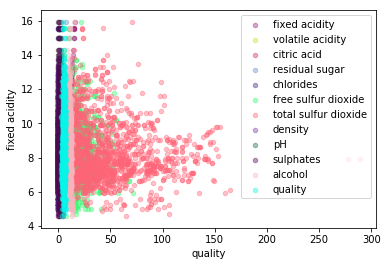

In [25]:
col=df_wine.columns[0] #Define the column to plot against
df_scatter=df_wine #Copy the DF
ax1=df_scatter.plot.scatter(x=col, y=col, color=np.random.rand(1,3), alpha=0.4, label=col) #Show the first scatter plot
for column in df_scatter.columns:
    if column!=col:
        ax1=df_scatter.plot.scatter(x=column, y=col, color=np.random.rand(1,3), ax=ax1, alpha=0.4,label=column) #Plot the rest

This scatter plot compares the fixed acidity against the other features present in the dataset. 

### Z-Score Standardization
As it can be seen in the last plot, the range of the values in each of the features is not the same or similar, so most of the values get 'squished' together, while the most disperse make themselves more visible. In these kinds of cases is that the standardization and normalization shows one of its useful applications:

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


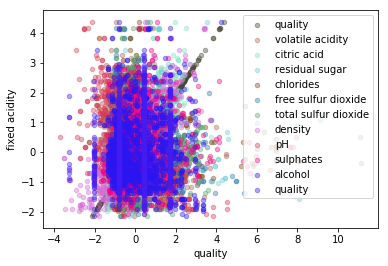

In [17]:
std_scale = preprocessing.StandardScaler().fit(df_wine) #Create the fitting model for the whole dataset
df_standardized = std_scale.transform(df_wine) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_standardized = pd.DataFrame(df_standardized, columns=df_wine.columns)
df_scatter=df_standardized #Copy the dataset
ax1=df_scatter.plot.scatter(x=col, y=col, color=np.random.rand(1,3), alpha=0.4, label=column)#Show the first scatter plot
for column in df_scatter.columns:
    if column!=col:
        ax1=df_scatter.plot.scatter(x=column, y=col, color=np.random.rand(1,3), ax=ax1, alpha=0.4,label=column)#Plot the rest

The data is now more condensed and less sparse, and it all occupies a range of -4 to about 10.

### Min-Max Normalization
Now with the min-max normalization:

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


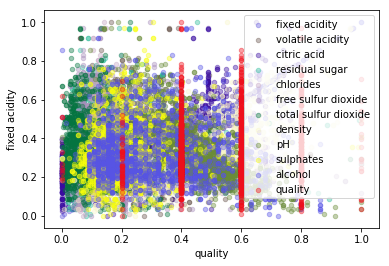

In [18]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_wine) #Create the fitting model
df_minmax = minmax_scale.transform(df_wine) #Apply the model to the DF
#Recreate the array as a DF and copy the column names, for easier viewing:
df_minmax = pd.DataFrame(df_minmax, columns=df_wine.columns)
df_scatter=df_minmax
ax1=df_scatter.plot.scatter(x=col, y=col, color=np.random.rand(1,3), alpha=0.4, label=col)
for column in df_scatter.columns:
    if column!=col:
        ax1=df_scatter.plot.scatter(x=column, y=col, color=np.random.rand(1,3), ax=ax1, alpha=0.4,label=column)

### Mean Subtracted Normalization

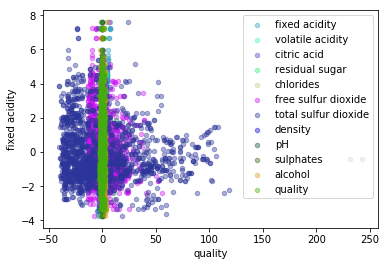

In [19]:
df_mean_subtracted = df_wine.copy() #Copy the DF
for column in df_wine_ten_rows.columns:
    mean = np.mean(df_wine[column]) #Obtain the mean for the column
    df_mean_subtracted[column] = df_wine[column].sub(mean) #Subtract the mean
df_scatter=df_mean_subtracted
ax1=df_scatter.plot.scatter(x=col, y=col, color=np.random.rand(1,3), alpha=0.4, label=col)
for column in df_scatter.columns:
    if column!=col:
        ax1=df_scatter.plot.scatter(x=column, y=col, color=np.random.rand(1,3), ax=ax1, alpha=0.4,label=column)

### Seaborn Library
The inconvenience of this plotting system is that it only allows for the plotting of one feature against the other at a time. Fortunately, there exists a library for python that allows for a more serious comparison of data. The library is called seaborn and a blog post on how to use it can be found in [8]. To use it, the function pairplot() must be called and the DataFrame must be input:

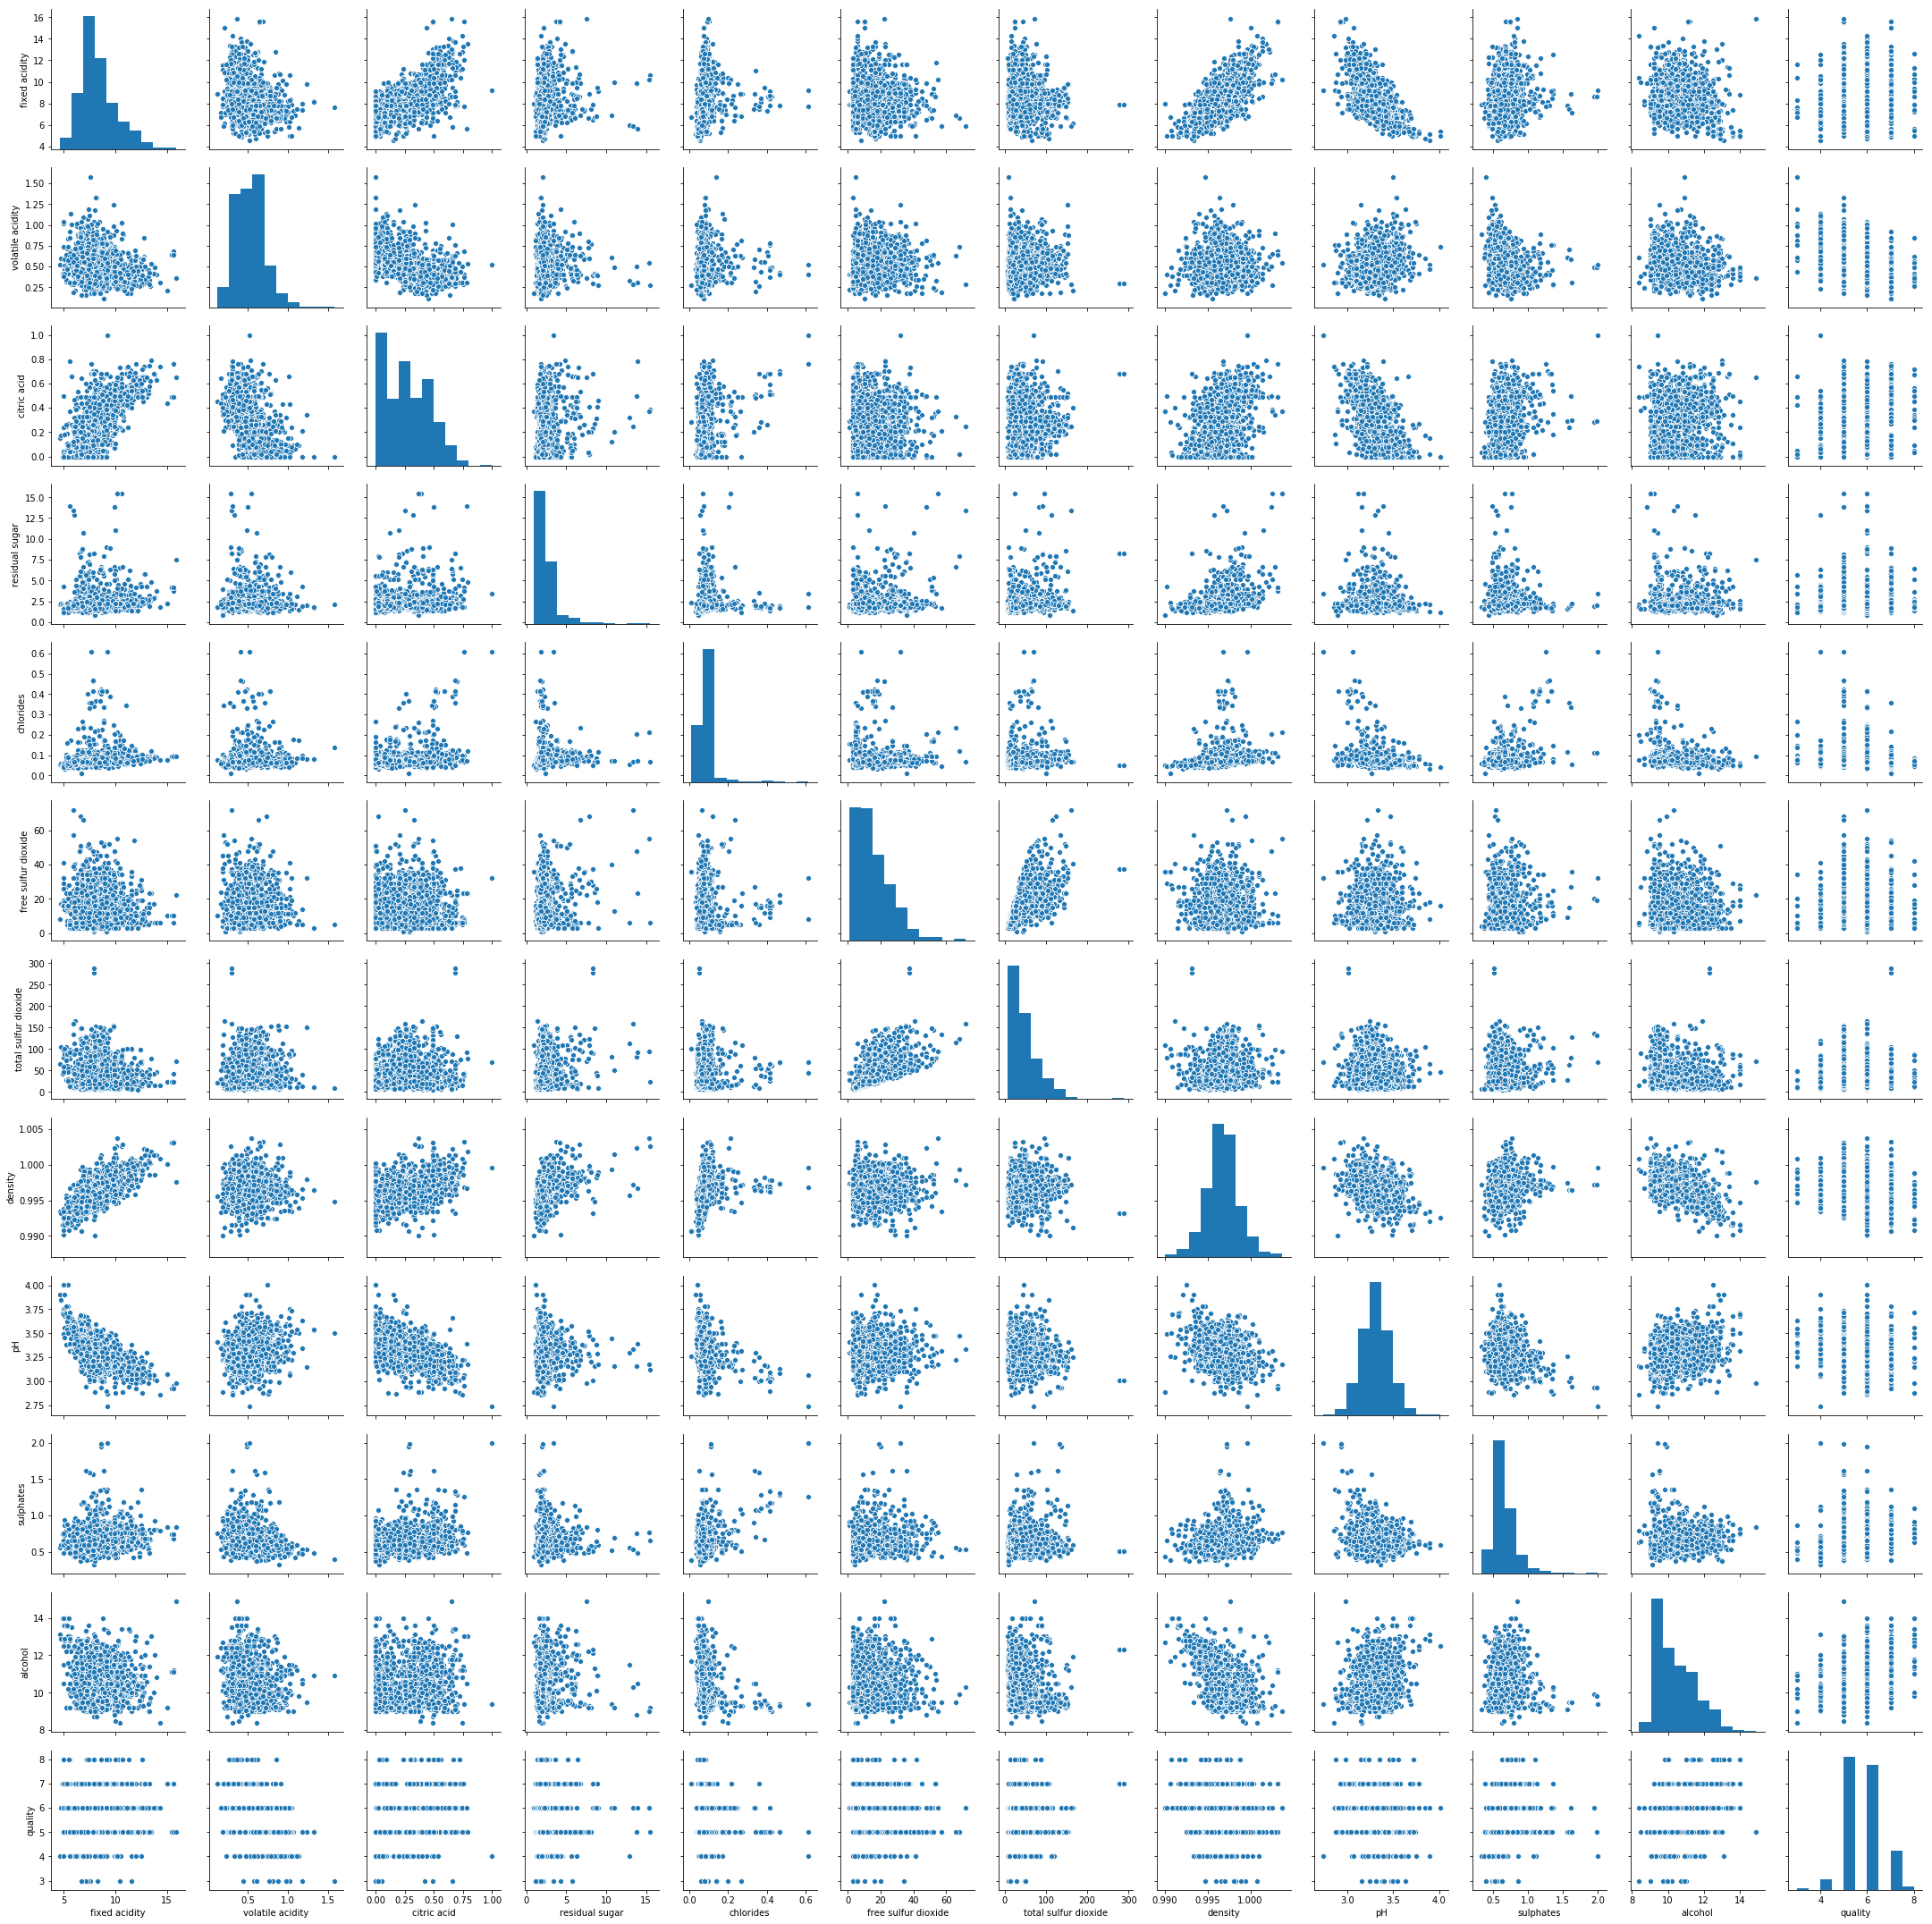

In [20]:
sns.pairplot(df_wine) #Plot the wine DF using the Seaborn library

As it can be seen, the seaborn library returns a graphic that includes all pair wise comparisons with the feature distribution in its diagonal. We can also plot the different standardized and normalized datasets:

In [21]:
sns.pairplot(df_standardized) #Plot the standardized DF using the Seaborn library

In [22]:
sns.pairplot(df_minmax) #Plot the MinMax normalized DF using the Seaborn library

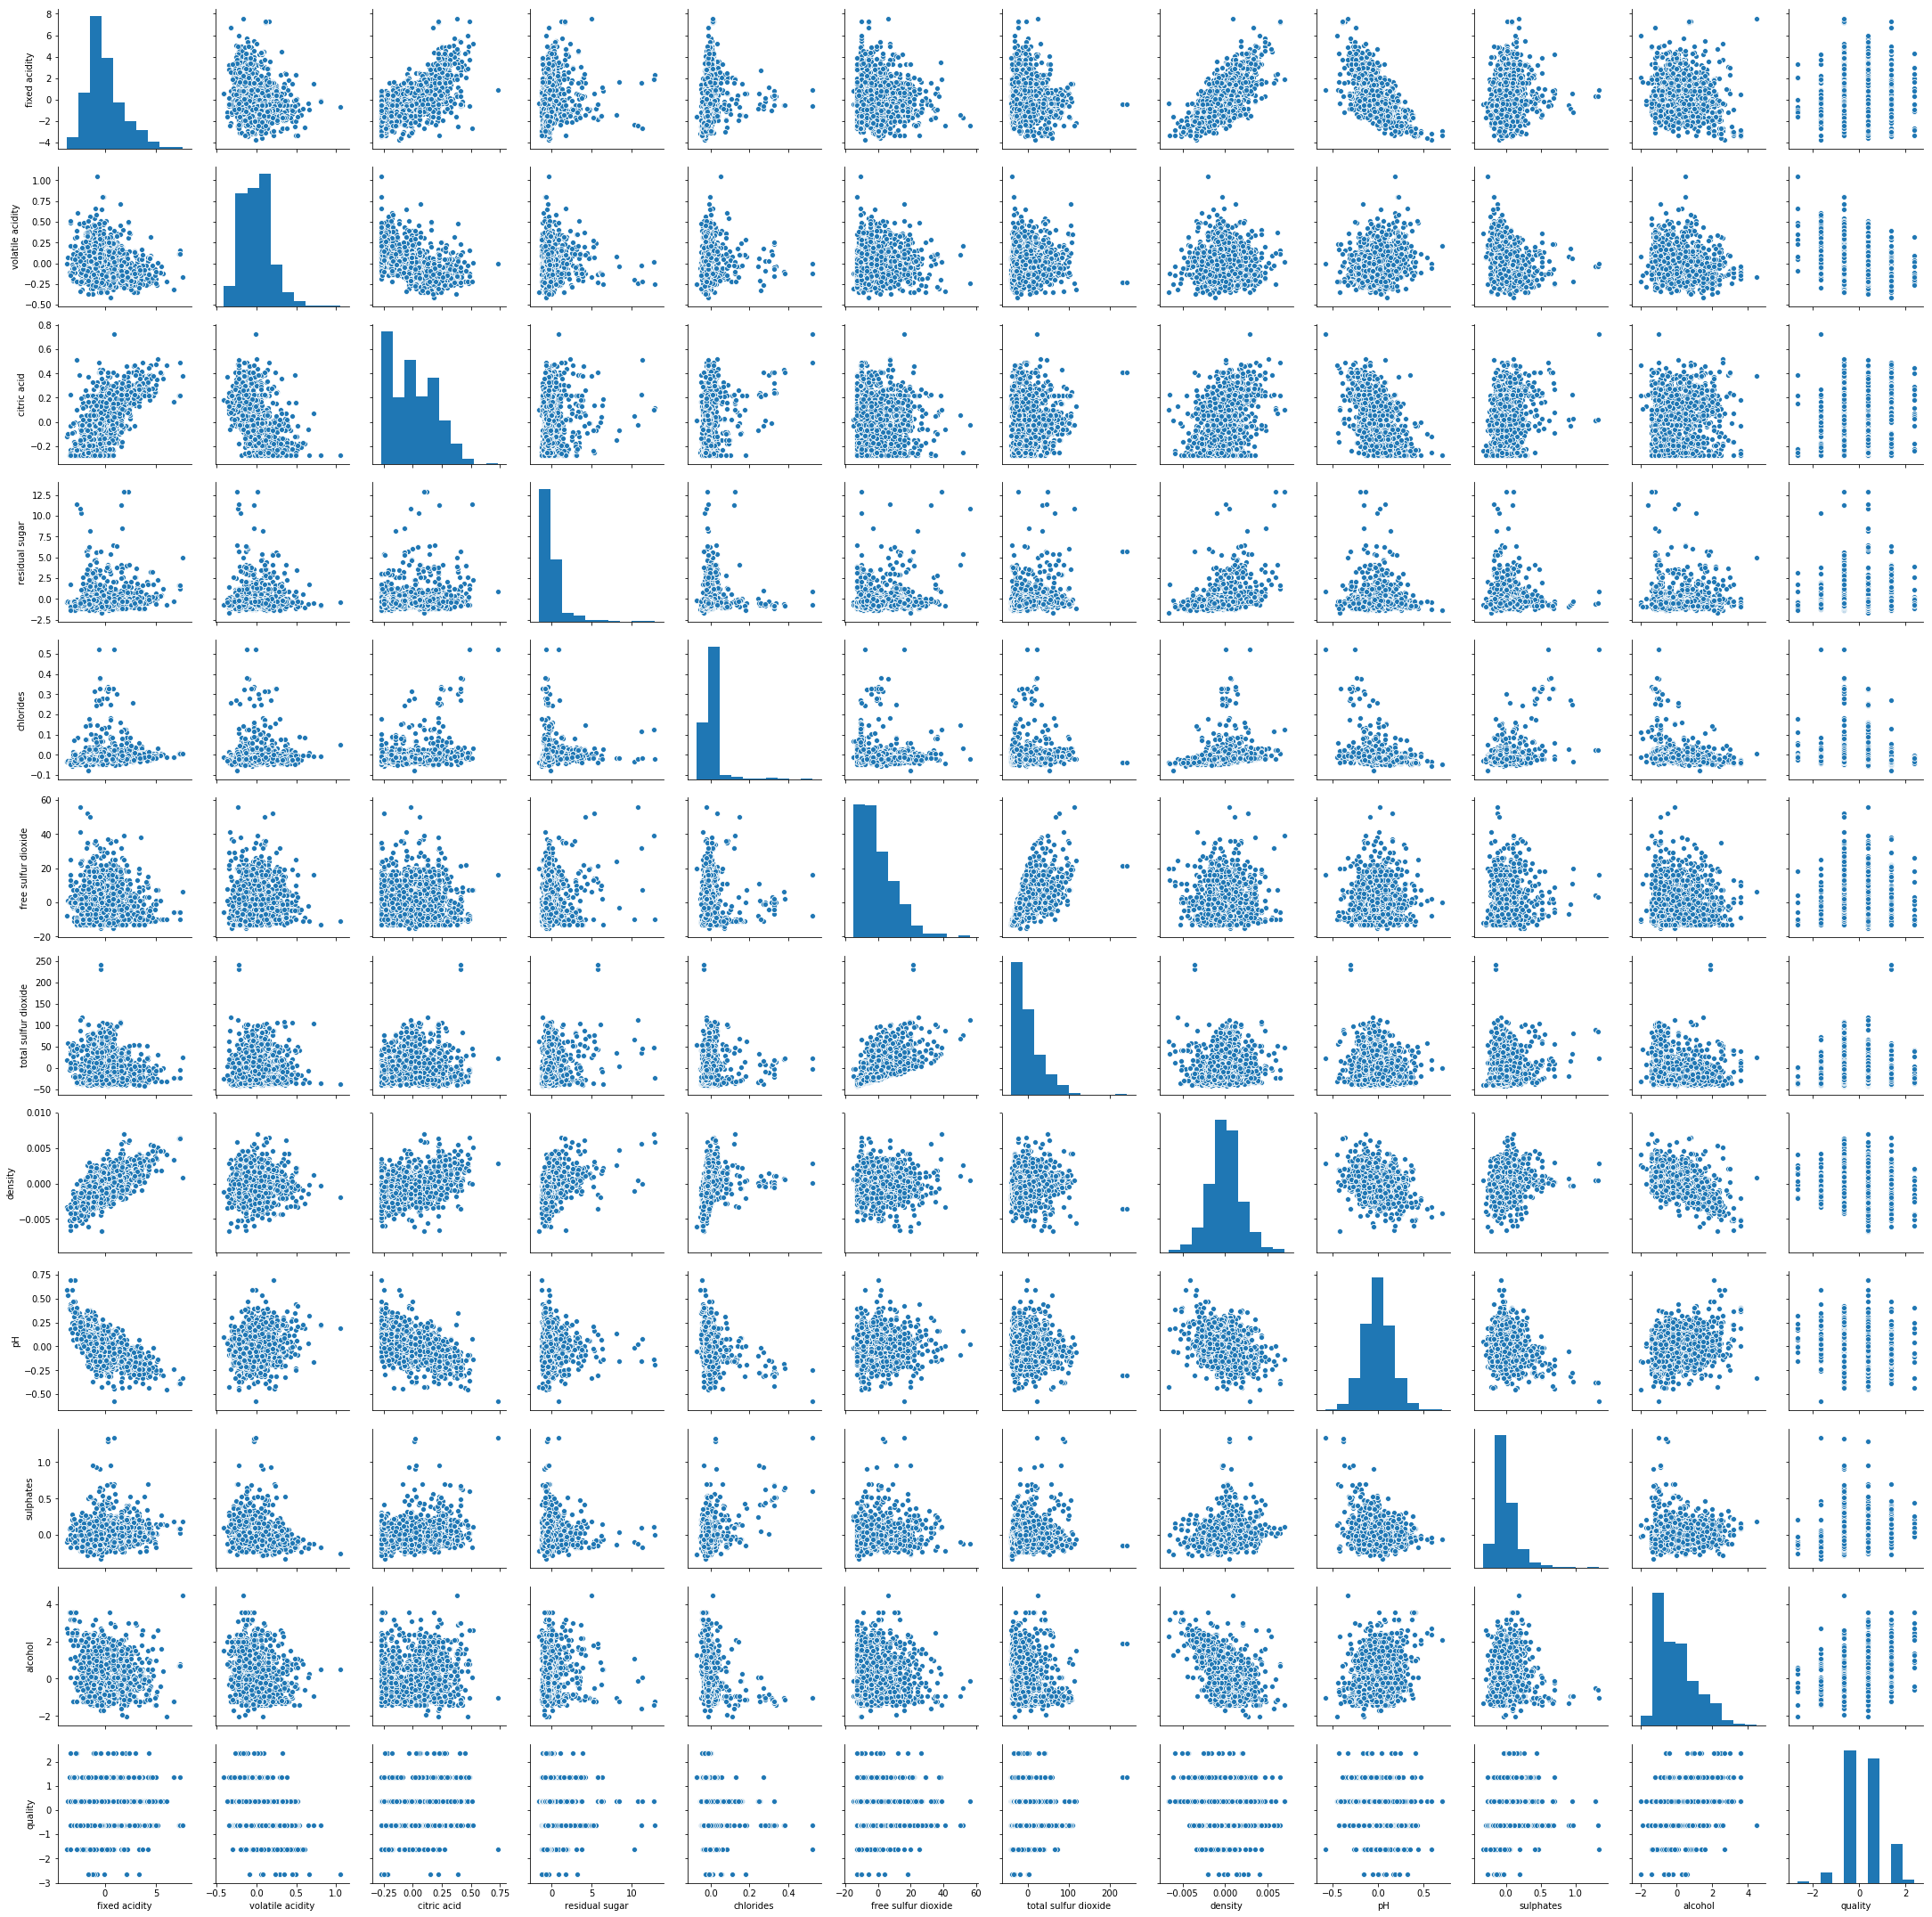

In [23]:
sns.pairplot(df_mean_subtracted) #Plot the mean subtracted normalized DF using the Seaborn library

In conclusion, the seaborn library is a great tool for visualizing data in a concise and easy to understand way, and it also helps that the library makes it easy to use.

## References

[1] S. Raschka, "About Feature Scaling and Normalization," Jul. 11, 2014. [Online]. Available: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization [Accessed January 15, 2019]

[2] Pandas Project, "Tutorials - pandas 0.23.4 documentation," Documentation on the use of the pandas library. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/tutorials.html. [Accessed January 15, 2019].

[3] The Scipy Community, "Statistics - NumPy v1.14.1 Manual," Documentation on the use of the NumPy library, Apr. 16, 2018. [Online]. Available: https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.statistics.html. [Accessed January 15, 2019].

[4] The Matplotlib Development Team, "matplotlib.pyplot.hist - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, Nov. 11, 2018. [Online]. Available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. [Accessed January 15, 2019].

[5] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, "Modeling wine preferences by data mining from physicochemical properties," Wine Quality Dataset, 2009.  [Online]. Available: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. [Accessed January 15, 2019].

[6] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, "Modeling wine preferences by data mining from physicochemical properties," Information regarding the Wine Quality Dataset, 2009. [Online]. Available: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names. [Accessed January 15, 2019].

[7] The Scipy Community, "scipy.spatial.distance.pdist — SciPy v1.2.0 Reference Guide," Documentation on the use of the scipy.spatial.distance.pdist function, Dec. 17, 2018. [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist. [Accessed January 15, 2019].

[8] W. Koehrsen, "Visualizing Data with Pairs Plots in Python," Towards Data Science, Apr. 6, 2018. [Online]. Available: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166. [Accessed January 15, 2019].